<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%204%20-%20Lesson%202%20-%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [3]:
import nltk
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download punkt_tab resource

from nltk.corpus import stopwords

# Read the Wikipedia text file
with open('wikipedia.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Split into sentences first
sentences = nltk.sent_tokenize(text)

stop_words = set(stopwords.words('english'))
cleaned_sentences = []

for sentence in sentences:
    # Lowercase
    sentence = sentence.lower()
    # Remove all characters except letters and spaces
    sentence = re.sub(r'[^a-z\s]', '', sentence)
    # Remove extra spaces
    sentence = re.sub(r'\s+', ' ', sentence).strip()
    # Remove stopwords
    words = sentence.split()
    words = [word for word in words if word not in stop_words]
    cleaned_sentence = ' '.join(words)

    # Add sentence only if not empty
    if cleaned_sentence:
        cleaned_sentences.append(cleaned_sentence)

corpus = list(set(cleaned_sentences))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [4]:
corpus

['work perceive environment agent receives information various inputs text voice sensor data',
 'learning adaptability agents improve performance time learning experiences consequences actions',
 'video explains fundamentals ai agents including components capabilitieskey characteristics ai agent perception agents gather information environment sensors input data',
 'understand reason using llms ai techniques agent processes information understand users intent current state environment',
 'adapt learn agent may receive feedback actions uses refine strategies improve future performance',
 'agents use ai particularly large language models llms understand respond user requests gather information plan workflows interact tools solve complex problems',
 'demonstrate autonomy learning adaptability allowing improve performance time even work agents multiagent systems coordinate perform complex operations',
 'autonomy operate independently making decisions carrying tasks without constant human i

In [5]:
tokenizer = Tokenizer()


In [6]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'agents': 1, 'environment': 2, 'agent': 3, 'actions': 4, 'ai': 5, 'information': 6, 'learning': 7, 'improve': 8, 'performance': 9, 'understand': 10, 'plan': 11, 'tasks': 12, 'achieve': 13, 'work': 14, 'data': 15, 'adaptability': 16, 'time': 17, 'gather': 18, 'llms': 19, 'uses': 20, 'use': 21, 'tools': 22, 'complex': 23, 'autonomy': 24, 'perform': 25, 'making': 26, 'decisions': 27, 'specific': 28, 'necessary': 29, 'action': 30, 'like': 31, 'system': 32, 'execute': 33, 'goals': 34, 'perceive': 35, 'receives': 36, 'various': 37, 'inputs': 38, 'text': 39, 'voice': 40, 'sensor': 41, 'experiences': 42, 'consequences': 43, 'video': 44, 'explains': 45, 'fundamentals': 46, 'including': 47, 'components': 48, 'capabilitieskey': 49, 'characteristics': 50, 'perception': 51, 'sensors': 52, 'input': 53, 'reason': 54, 'using': 55, 'techniques': 56, 'processes': 57, 'users': 58, 'intent': 59, 'current': 60, 'state': 61, 'adapt': 62, 'learn': 63, 'may': 64, 'receive': 65, 'feedback': 66, 'refine': 67, 

In [7]:
input_sequences = []

for line in corpus:
  print([line])
  #break

['work perceive environment agent receives information various inputs text voice sensor data']
['learning adaptability agents improve performance time learning experiences consequences actions']
['video explains fundamentals ai agents including components capabilitieskey characteristics ai agent perception agents gather information environment sensors input data']
['understand reason using llms ai techniques agent processes information understand users intent current state environment']
['adapt learn agent may receive feedback actions uses refine strategies improve future performance']
['agents use ai particularly large language models llms understand respond user requests gather information plan workflows interact tools solve complex problems']
['demonstrate autonomy learning adaptability allowing improve performance time even work agents multiagent systems coordinate perform complex operations']
['autonomy operate independently making decisions carrying tasks without constant human i

In [8]:
input_sequences = []

for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    print(token_list)
    #break

[14, 35, 2, 3, 36, 6, 37, 38, 39, 40, 41, 15]
[7, 16, 1, 8, 9, 17, 7, 42, 43, 4]
[44, 45, 46, 5, 1, 47, 48, 49, 50, 5, 3, 51, 1, 18, 6, 2, 52, 53, 15]
[10, 54, 55, 19, 5, 56, 3, 57, 6, 10, 58, 59, 60, 61, 2]
[62, 63, 3, 64, 65, 66, 4, 20, 67, 68, 8, 69, 9]
[1, 21, 5, 70, 71, 72, 73, 19, 10, 74, 75, 76, 18, 6, 11, 77, 78, 22, 79, 23, 80]
[81, 24, 7, 16, 82, 8, 9, 17, 83, 14, 1, 84, 85, 86, 25, 23, 87]
[24, 88, 89, 26, 27, 90, 12, 91, 92, 93, 94]
[95, 1, 96, 28, 97, 98, 13, 99, 29, 12]
[30, 1, 25, 4, 2, 100, 101, 102, 2, 31, 103, 104, 105, 106, 31, 107, 108, 32]
[11, 33, 4, 109, 34, 110, 3, 111, 11, 20, 112, 22, 33, 29, 113]
[5, 3, 114, 32, 115, 116, 117, 13, 28, 34, 118, 2, 26, 27, 119, 4, 120, 12]
[121, 122, 21, 123, 124, 125, 126, 127, 128, 30, 13, 129]


In [9]:
input_sequences = []

for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

In [10]:
input_sequences

[[14, 35],
 [14, 35, 2],
 [14, 35, 2, 3],
 [14, 35, 2, 3, 36],
 [14, 35, 2, 3, 36, 6],
 [14, 35, 2, 3, 36, 6, 37],
 [14, 35, 2, 3, 36, 6, 37, 38],
 [14, 35, 2, 3, 36, 6, 37, 38, 39],
 [14, 35, 2, 3, 36, 6, 37, 38, 39, 40],
 [14, 35, 2, 3, 36, 6, 37, 38, 39, 40, 41],
 [14, 35, 2, 3, 36, 6, 37, 38, 39, 40, 41, 15],
 [7, 16],
 [7, 16, 1],
 [7, 16, 1, 8],
 [7, 16, 1, 8, 9],
 [7, 16, 1, 8, 9, 17],
 [7, 16, 1, 8, 9, 17, 7],
 [7, 16, 1, 8, 9, 17, 7, 42],
 [7, 16, 1, 8, 9, 17, 7, 42, 43],
 [7, 16, 1, 8, 9, 17, 7, 42, 43, 4],
 [44, 45],
 [44, 45, 46],
 [44, 45, 46, 5],
 [44, 45, 46, 5, 1],
 [44, 45, 46, 5, 1, 47],
 [44, 45, 46, 5, 1, 47, 48],
 [44, 45, 46, 5, 1, 47, 48, 49],
 [44, 45, 46, 5, 1, 47, 48, 49, 50],
 [44, 45, 46, 5, 1, 47, 48, 49, 50, 5],
 [44, 45, 46, 5, 1, 47, 48, 49, 50, 5, 3],
 [44, 45, 46, 5, 1, 47, 48, 49, 50, 5, 3, 51],
 [44, 45, 46, 5, 1, 47, 48, 49, 50, 5, 3, 51, 1],
 [44, 45, 46, 5, 1, 47, 48, 49, 50, 5, 3, 51, 1, 18],
 [44, 45, 46, 5, 1, 47, 48, 49, 50, 5, 3, 51, 1, 18, 6

In [11]:
# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [12]:
max_sequence_len

21

In [13]:
input_sequences

array([[  0,   0,   0, ...,   0,  14,  35],
       [  0,   0,   0, ...,  14,  35,   2],
       [  0,   0,   0, ...,  35,   2,   3],
       ...,
       [  0,   0,   0, ..., 127, 128,  30],
       [  0,   0,   0, ..., 128,  30,  13],
       [  0,   0,   0, ...,  30,  13, 129]], dtype=int32)

In [14]:
# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

xs

array([[  0,   0,   0, ...,   0,   0,  14],
       [  0,   0,   0, ...,   0,  14,  35],
       [  0,   0,   0, ...,  14,  35,   2],
       ...,
       [  0,   0,   0, ..., 126, 127, 128],
       [  0,   0,   0, ..., 127, 128,  30],
       [  0,   0,   0, ..., 128,  30,  13]], dtype=int32)

In [15]:
total_words

130

In [16]:
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)
ys.shape

(178, 130)

In [17]:
print(tokenizer.word_index)

{'agents': 1, 'environment': 2, 'agent': 3, 'actions': 4, 'ai': 5, 'information': 6, 'learning': 7, 'improve': 8, 'performance': 9, 'understand': 10, 'plan': 11, 'tasks': 12, 'achieve': 13, 'work': 14, 'data': 15, 'adaptability': 16, 'time': 17, 'gather': 18, 'llms': 19, 'uses': 20, 'use': 21, 'tools': 22, 'complex': 23, 'autonomy': 24, 'perform': 25, 'making': 26, 'decisions': 27, 'specific': 28, 'necessary': 29, 'action': 30, 'like': 31, 'system': 32, 'execute': 33, 'goals': 34, 'perceive': 35, 'receives': 36, 'various': 37, 'inputs': 38, 'text': 39, 'voice': 40, 'sensor': 41, 'experiences': 42, 'consequences': 43, 'video': 44, 'explains': 45, 'fundamentals': 46, 'including': 47, 'components': 48, 'capabilitieskey': 49, 'characteristics': 50, 'perception': 51, 'sensors': 52, 'input': 53, 'reason': 54, 'using': 55, 'techniques': 56, 'processes': 57, 'users': 58, 'intent': 59, 'current': 60, 'state': 61, 'adapt': 62, 'learn': 63, 'may': 64, 'receive': 65, 'feedback': 66, 'refine': 67, 

In [18]:
total_words, max_sequence_len

(130, 21)

In [19]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.0200 - loss: 4.8774   
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0279 - loss: 4.8268    
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0568 - loss: 4.5442
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0839 - loss: 4.1850
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1077 - loss: 3.7140
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1406 - loss: 3.2538
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2504 - loss: 2.6263
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3260 - loss: 2.1436
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4201 - loss: 1.7019
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5254 - loss: 1.4676
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6583 - loss: 1.1309
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.71

In [20]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

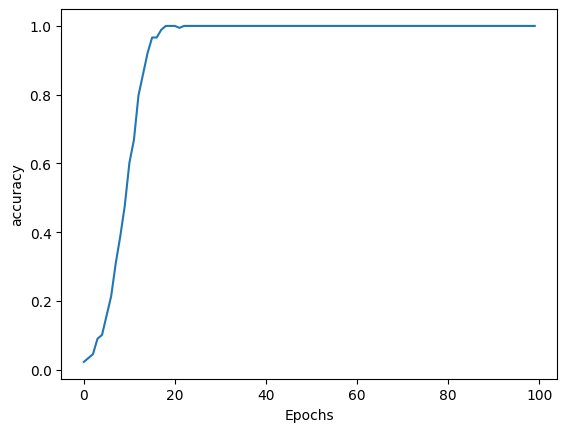

In [21]:
plot_graphs(history, 'accuracy')


In [22]:
seed_text = "agentic ai in future"
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━

In [23]:
seed_text = "agentic ai use cases are"
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    print(f"token_list is: {token_list}")
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    print(f"token_list is after padding: {token_list}")
    predicted = np.argmax(model.predict(token_list), axis=-1)
    print(f"after argmax: {predicted}")
    output_word = ""
    #print(f"tokenizer word-index: {tokenizer.word_index.items()}")
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

token_list is: [5, 21]
token_list is after padding: [[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5 21]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
after argmax: [3]
token_list is: [5, 21, 3]
token_list is after padding: [[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5 21  3]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
after argmax: [114]
token_list is: [5, 21, 3, 114]
token_list is after padding: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   5  21
    3 114]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
after argmax: [32]
token_list is: [5, 21, 3, 114, 32]
token_list is after padding: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   5  21   3
  114  32]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
after argmax: [115]
token_list is: [5, 21, 3, 114, 32, 115]
token_list is after padding: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   5  21   3 114
   32 115]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
after argmax: [117]
token_list is: [5, 21, 3, 1